In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# 1. Some data preprocessing

In [3]:
# Reading in the df
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/539_final_project/spotify-2023.csv', encoding='cp1252')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# raw dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [6]:
# We can see from this that we're missing values in cols 'in_shazam_charts' and 'key'
print(df.isnull().sum())
print(df['streams'].isna().sum())

df = df.dropna()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
0


In [7]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'].isna().sum()

<ipython-input-7-76e74de21b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


1

In [8]:
# Remove NaN values after converting streams to numeric
df.dropna(subset=df.columns.difference(['track_and_artist']), inplace=True)

df.isna().sum()

<ipython-input-8-69a43fc13207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=df.columns.difference(['track_and_artist']), inplace=True)


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

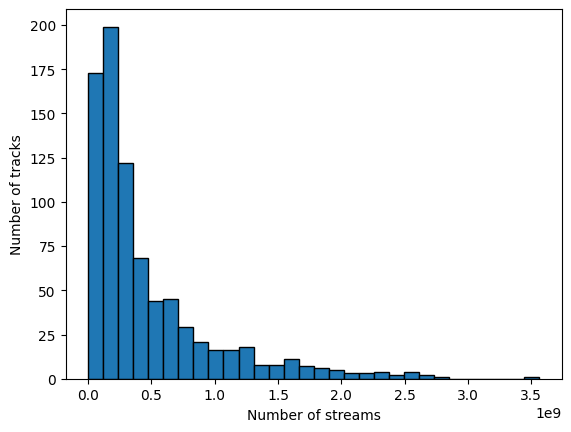

In [9]:
plt.hist(df['streams'], bins=30, edgecolor='black', linewidth=1)
plt.xlabel('Number of streams')
plt.ylabel('Number of tracks')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   in_spotify_playlists  816 non-null    int64  
 7   in_spotify_charts     816 non-null    int64  
 8   streams               816 non-null    float64
 9   in_apple_playlists    816 non-null    int64  
 10  in_apple_charts       816 non-null    int64  
 11  in_deezer_playlists   816 non-null    object 
 12  in_deezer_charts      816 non-null    int64  
 13  in_shazam_charts      816 non-null    object 
 14  bpm                   816 non-null    int64  
 15  key                   8

In [11]:
## TODO: re-add key, 'mode'
df['track_and_artist'] = df['track_name'] + '-' + df['artist(s)_name']
voi_col = ['track_and_artist', 'streams', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'key', 'mode', 'bpm']
df_voi = df[voi_col]
df_voi.head()

,track_and_artist,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key,mode,bpm
0,"Seven (feat. Latto) (Explicit Ver.)-Latto, Jun...",141381703.0,80,89,83,31,0,8,4,B,Major,125
1,LALA-Myke Towers,133716286.0,71,61,74,7,0,10,4,C#,Major,92
2,vampire-Olivia Rodrigo,140003974.0,51,32,53,17,0,31,6,F,Major,138
3,Cruel Summer-Taylor Swift,800840817.0,55,58,72,11,0,11,15,A,Major,170
4,WHERE SHE GOES-Bad Bunny,303236322.0,65,23,80,14,63,11,6,A,Minor,144


In [12]:
df_features = df_voi
df_features = pd.get_dummies(df_voi, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features.head()

,track_and_artist,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,"Seven (feat. Latto) (Explicit Ver.)-Latto, Jun...",141381703.0,80,89,83,31,0,8,4,125,...,0,0,0,0,0,0,0,0,1,0
1,LALA-Myke Towers,133716286.0,71,61,74,7,0,10,4,92,...,1,0,0,0,0,0,0,0,1,0
2,vampire-Olivia Rodrigo,140003974.0,51,32,53,17,0,31,6,138,...,0,0,0,0,1,0,0,0,1,0
3,Cruel Summer-Taylor Swift,800840817.0,55,58,72,11,0,11,15,170,...,0,0,0,0,0,0,0,0,1,0
4,WHERE SHE GOES-Bad Bunny,303236322.0,65,23,80,14,63,11,6,144,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#rename columns of interests
re_col = {
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness',
    'instrumentalness_%': 'instrumentalness'
}

df_features.rename(columns=re_col, inplace=True)

for feat in re_col.values():
  df_features[feat] = df_features[feat].div(100)

df_features.head()

,track_and_artist,streams,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,bpm,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,"Seven (feat. Latto) (Explicit Ver.)-Latto, Jun...",141381703.0,0.80,0.89,0.83,0.31,0.00,0.08,0.04,125,...,0,0,0,0,0,0,0,0,1,0
1,LALA-Myke Towers,133716286.0,0.71,0.61,0.74,0.07,0.00,0.10,0.04,92,...,1,0,0,0,0,0,0,0,1,0
2,vampire-Olivia Rodrigo,140003974.0,0.51,0.32,0.53,0.17,0.00,0.31,0.06,138,...,0,0,0,0,1,0,0,0,1,0
3,Cruel Summer-Taylor Swift,800840817.0,0.55,0.58,0.72,0.11,0.00,0.11,0.15,170,...,0,0,0,0,0,0,0,0,1,0
4,WHERE SHE GOES-Bad Bunny,303236322.0,0.65,0.23,0.80,0.14,0.63,0.11,0.06,144,...,0,0,0,0,0,0,0,0,0,1


In [14]:
class Preprocessor:
  def __init__(self):
    self.x_scaler = None
    self.max_y = None

  def fit_transform(self, df):
    """Use for training"""

    y = df['streams'].values.reshape(-1, 1)
    y = np.log(y)
    self.max_y = max(y)
    self.min_y = min(y)
    y_scaled = (y - self.min_y) / (self.max_y - self.min_y)

    X = df.drop(['streams', 'track_and_artist'], axis=1).values

    self.x_scaler = StandardScaler()
    X_scaled = self.x_scaler.fit_transform(X)

    return X_scaled, y_scaled

  def transform(self, df):
    """Use for predictions"""

    if self.x_scaler is None or self.max_y is None:
      raise Exception('Call fit_transform first!')

    y = df['streams'].values.reshape(-1, 1)
    y = np.log(y)
    y_scaled = y / self.max_y

    X = df.drop(['streams', 'track_and_artist'], axis=1).values
    X_scaled = self.x_scaler.transform(X)

    return X_scaled, y_scaled

  def inverse_transform(self, X_scaled, y_scaled):
    if self.x_scaler is None or self.max_y is None:
      raise Exception('Call fit_transform first!')

    if X_scaled is not None:
      X_orig = self.x_scaler.inverse_transform(X_scaled)
    else:
      X_orig = None


    y_orig = np.exp(y_scaled * self.max_y) if y_scaled is not None else None

    return X_orig, y_orig

In [35]:
# Normalize the feature variables using StandardScaler, log y values and scale to [0, 1]
preprocessor = Preprocessor()
X, y = preprocessor.fit_transform(df_features)

# Construct track to index dictionary
track2idx = dict()
for idx in range(len(df_features)):
  track2idx[df_features.iloc[idx]['track_and_artist']] = idx

print('Cruel Summer-Taylor Swift idx',  track2idx['Cruel Summer-Taylor Swift'])

print("X[0]", X[0])
print("y[0]", y[0])

Cruel Summer-Taylor Swift idx 3
X[0] [ 0.85768756  1.60242241  1.15748749  0.18327973 -0.19150181 -0.7510259
 -0.63969891  0.08587151 -0.306323   -0.26883699  3.09796749 -0.40503254
 -0.32510161 -0.19536617 -0.27917599 -0.34545848 -0.30392347 -0.35428413
 -0.34099717  0.89961805 -0.89961805]
y[0] [0.77066384]


In [36]:
# Split the dataset into training (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

print("X_train[0]", X_train[0])
print("y_train[0]", y_train[0])

Training set: (571, 21) (571, 1)
Validation set: (122, 21) (122, 1)
Test set: (123, 21) (123, 1)
X_train[0] [ 0.380842    1.56006077 -0.45674078  1.16513545 -0.19150181 -0.97255999
 -0.83545901 -0.8725485  -0.306323   -0.26883699  3.09796749 -0.40503254
 -0.32510161 -0.19536617 -0.27917599 -0.34545848 -0.30392347 -0.35428413
 -0.34099717  0.89961805 -0.89961805]
y_train[0] [0.80733708]


# Defining our Model

In [37]:
def build_model(n_hidden=3, hidden_dim=16):
  model = Sequential()

  model.add(Dropout(0.2, input_shape=(X_train.shape[1],)))
  model.add(Dense(hidden_dim, activation='relu', input_shape=(X_train.shape[1],)))

  for i in range(n_hidden - 1):
    model.add(Dense(hidden_dim, activation='relu'))

  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(1))

  return model

model = build_model(hidden_dim=8)

# Optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0) # 0.001 #0.0005

# Compile the model
# Using Mean Squared Error (MSE) as loss function
model.compile(optimizer=opt, loss='huber_loss', metrics=['mean_squared_error'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 21)                0         
                                                                 
 dense_10 (Dense)            (None, 8)                 176       
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.5

In [39]:
import tensorflow as tf
Epoches = 100
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_loss = logs['val_loss']
        val_mse = logs['val_mean_squared_error']
        test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)

        print(f' - Validation Loss: {val_loss:.4f} - Validation MSE: {val_mse:.4f} - Test Loss: {test_loss:.4f} - Test MSE: {test_mse:.4f}')

callback = CustomCallback()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=Epoches,
    batch_size=32,
    callbacks=[callback]
)

Epoch 1/100
18/18 [==============================] - 3s 26ms/step - loss: 0.1206 - mean_squared_error: 0.2413 - val_loss: 0.1066 - val_mean_squared_error: 0.2140
Epoch 2/100
18/18 [==============================] - 0s 15ms/step - loss: 0.0850 - mean_squared_error: 0.1701 - val_loss: 0.0755 - val_mean_squared_error: 0.1514
Epoch 3/100
18/18 [==============================] - 0s 17ms/step - loss: 0.0566 - mean_squared_error: 0.1131 - val_loss: 0.0533 - val_mean_squared_error: 0.1069
Epoch 4/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0404 - mean_squared_error: 0.0807 - val_loss: 0.0386 - val_mean_squared_error: 0.0773
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0290 - mean_squared_error: 0.0580 - val_loss: 0.0294 - val_mean_squared_error: 0.0588
Epoch 6/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0207 - mean_squared_error: 0.0414 - val_loss: 0.0237 - val_mean_squared_error: 0.0474
Epoch 7/100
18/18 [=========

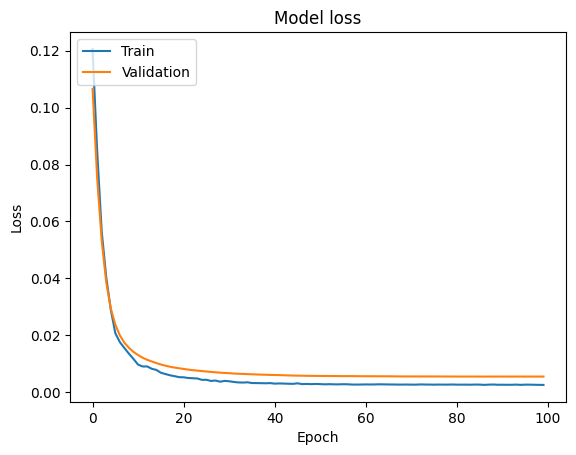

In [40]:
def plot_training(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

plot_training(history)

# Tune Hyperparameters

In [41]:
def build_and_fit(n_hidden=3, hidden_dim=16, lr=0.0005, batch_size=32, epochs=50):
  model = build_model(n_hidden=n_hidden, hidden_dim=hidden_dim)

  # Optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=lr, clipnorm=1.0)

  # Compile the model
  # Using Mean Squared Error (MSE) as loss function
  model.compile(optimizer=opt, loss='huber_loss', metrics=['mean_squared_error'])


  history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=epochs,
      batch_size=batch_size
  )

  plot_training(history)

  return history

# Evaluate model on test set

4/4 [==============================] - 0s 3ms/step
(123, 1) (123, 1)
MSE on test set = 0.0018
26/26 [==============================] - 0s 2ms/step


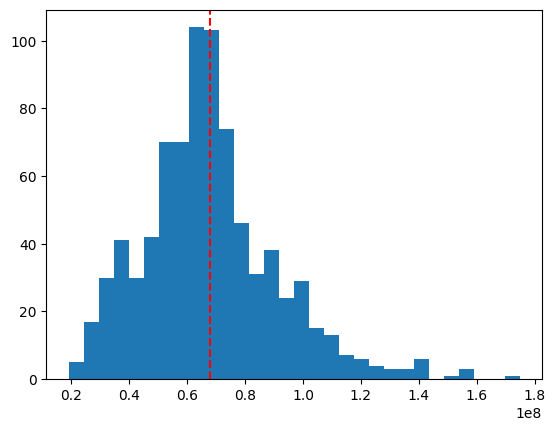

67826536.1857958


In [42]:
yhat_test = model.predict(X_test)
print(y_test.shape, yhat_test.shape)

# yhat_test_orig = scaler.inverse_transform(yhat_test).flatten()

mse = metrics.mean_squared_error(y_test[None, :], yhat_test[None, :]).numpy().ravel()[0]
print(f"MSE on test set = {mse:.4f}")

yhat_all = model.predict(X)
_, yhat_all_inv = preprocessor.inverse_transform(None, yhat_all)
plt.hist(yhat_all_inv, bins= 30)
plt.axvline(x= np.mean(yhat_all_inv), color='r', ls='--')
plt.show()

print(np.mean(yhat_all_inv))

In [43]:
## Test on specific songs
import random

# songs = [
#     'Cruel Summer-Taylor Swift',
#     'First Class-Jack Harlow',
#     'Softcore-The Neighbourhood',
#     'Seven (feat. Latto) (Explicit Ver.)-Latto, Jung Kook'
# ]

songs = [
    'Stargirl Interlude-The Weeknd, Lana Del Rey',
    'Falling-Harry Styles',
    'All of Me-John Legend',
    'Blank Space-Taylor Swift'
]

song_idx = [track2idx[song] for song in songs]

def evaluate_on_songs(model, n=4):

    for i in range(n):
        idx = song_idx[i] #random.randint(0, len(X) - 1)
        df_song = df_features.iloc[idx]
        song_name = f"Song {idx}: {df_song['track_and_artist']}"

        X_song = X[idx][None] # input features
        y_song = y[idx] # transformed y_true

        yhat = model.predict(X_song).flatten() # output in log(streams) / max_y

        _, yhat_orig = preprocessor.inverse_transform(None, yhat) # transform yhat back to raw streams number
        streams_true = df_song['streams'].item() # get original streams from dataframe
        sq_err = np.square(yhat - y_song).item() # squared error using transformed streams

        print(f'{song_name}:\n\tyhat={yhat.item():.3f} | y_song={y_song.item():.3f}')
        print(f'\tstreams_pred={yhat_orig.item():,.0f} | streams_true={streams_true:,.0f} | sq_err = {sq_err:.3f}')

evaluate_on_songs(model)

1/1 [==============================] - 0s 18ms/step
Song 126: Stargirl Interlude-The Weeknd, Lana Del Rey:
	yhat=0.856 | y_song=0.875
	streams_pred=149,430,947 | streams_true=611,700,552 | sq_err = 0.000
1/1 [==============================] - 0s 19ms/step
Song 632: Falling-Harry Styles:
	yhat=0.847 | y_song=0.911
	streams_pred=123,819,340 | streams_true=1,023,187,129 | sq_err = 0.004
1/1 [==============================] - 0s 19ms/step
Song 518: All of Me-John Legend:
	yhat=0.831 | y_song=0.962
	streams_pred=86,252,227 | streams_true=2,086,124,197 | sq_err = 0.017
1/1 [==============================] - 0s 17ms/step
Song 32: Blank Space-Taylor Swift:
	yhat=0.826 | y_song=0.931
	streams_pred=78,124,369 | streams_true=1,355,959,075 | sq_err = 0.011


In [44]:
model.layers[1].weights

[<tf.Variable 'dense_10/kernel:0' shape=(21, 8) dtype=float32, numpy=
 array([[-0.37894416,  0.00808292,  0.00782294, -0.3624453 ,  0.05251507,
          0.40666753, -0.25674966,  0.44834107],
        [-0.29898226,  0.19433379, -0.37401375,  0.21485516, -0.33682284,
          0.16484231, -0.27121535,  0.11734293],
        [-0.318673  , -0.32622632,  0.1040136 ,  0.38768578, -0.16704638,
         -0.23588167,  0.16508132,  0.02285749],
        [ 0.0939489 ,  0.05626744,  0.33222649,  0.36977628,  0.17695643,
         -0.03832205, -0.30910134, -0.33310562],
        [ 0.01257311, -0.17742074,  0.09487409,  0.01243522, -0.24153352,
         -0.3474803 , -0.3665943 ,  0.11805411],
        [ 0.3154732 , -0.10924163,  0.39287764, -0.38703197,  0.33604977,
         -0.3947903 , -0.17169908,  0.10167804],
        [ 0.22472285, -0.0742264 , -0.22458874,  0.3467505 , -0.19133106,
          0.18452433,  0.0813211 ,  0.369418  ],
        [ 0.26350862, -0.16186824,  0.04617249, -0.11674906, -0.36421